## Introduction: Getting started with numpy

Today we dip our toes in the waters of numerical processing.
`numpy` ("Numerical Python") is a core library used in pretty much any analysis written in Python. It implements a number of basic linear algebra routines, with the idea that mathmatical operations can be applied to time series and arrays of numbers, similarly to variables in standard programming. Conceptually, numpy borrows substantially from the numerical core of Matlab, which itself is built on the venerated LINPACK library.

`matplotlib` is a bare-bones plotting library, which also has its roots in Matlab. While many other plotting libraries exist, and many make prettier pictures, matlplotlib can usually get the job done. 

To illustrate the use of basic numpy and matplotlib functions, we'll perform some basic analysis on spike data recorded from auditory cortex. 

### Tuning curves

<img src="tuning_curve_example.png"/>

### Spike rasters

<img src="raster_example.png"/>



### Todays learning objectives

* basics of numpy for vector/array computation
* simple plotting routines using matplotlib
* measure stimulus-evoked firing rate in single neuron data recorded from auditory cortex
* compute and plot a frequency tuning curve
* plot a spike raster, aligned to stimulus onset times


## Introduction to numpy arrays and matrices

### Lists vs. arrays

We start by importing the numpy and matplotlib libraries. "np" and "plt" are standard aliases, which make subsequent code more compact. The line `"%matplotlib inline"` may not be necessary for your system, but is necessary to get plots to display in some jupyter notebook installations.

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

You should already be familiar with the python `list` data structure.

In [4]:
l = [1, 2, 3]
l

[1, 2, 3]

A numpy `array` look a lot like a list, though the declaration is a bit more complicated.

In [5]:
arr = np.array([1, 2, 3])
arr

array([1, 2, 3])

Say you wanted to add 1 to every entry in a list. It might be nice if you could do this, but if you try to execute it, you'll get an error. 

In [6]:
l+1

TypeError: can only concatenate list (not "int") to list

Instead, the + operation tries to concatenate lists:

In [7]:
l + [1]

[1, 2, 3, 1]

Wiht an array, however, entry-wise addition is the native behavior.

In [8]:
arr+1

array([2, 3, 4])

Notice also that * (multiplication) has very different effect on lists vs. arrays:

In [9]:
l*2

[1, 2, 3, 1, 2, 3]

In [10]:
arr*2

array([2, 4, 6])

There are many other differences between lists and arrays that will come clear below.

### Basic array operations

Often you want to compute statistics on the numbers in an array. Let's start with a slightly bigger one

In [11]:
a = np.array([1, 2, 3, 5, 8, 13, 21, 34, 55])

There are a bunch of numpy functions to do the basics.

In [12]:
np.sum(a)

142

In [13]:
np.mean(a)

15.777777777777779

In [14]:
np.median(a)

8.0

In [15]:
np.max(a)

55

In [16]:
np.min(a)

1

Note, also, that many of these functions are replicated as methods on the array object:

In [17]:
a.mean()

15.777777777777779

But, weirdly, not all of them:

In [18]:
a.median()

AttributeError: 'numpy.ndarray' object has no attribute 'median'

### 1-D versus 2-D arrays

The `shape` property is often useful

In [19]:
arr.shape

(3,)

Arrays are not limited to being 1-dimensional. In linear algegra, a 1-d array is also called a vector. A 2-d array is a called a matrix

In [20]:
arr2 = np.array([[1,2,3],[4,5,6]])
arr2.shape

(2, 3)

One confusing thing, though, is that an array of length N is not exactly the same thing as an Nx1 or 1xN matrix. For the today, it shouldn't be an issue, but it's something to be aware of.

In [21]:
arr1 = np.array([[1,2,3]])
arr1.shape, arr.shape

((1, 3), (3,))

Pro tip: A very convenient feature of numpy is the behavior called broadcasting. Look what happens if I add 2x3 matrix to a vector of length 3

In [22]:
arr2 + arr1

array([[2, 4, 6],
       [5, 7, 9]])

Bonus exercise. Can you create and add a 1x3 and a 4x1 array? How big is the result?

In [23]:
#Answer
a1 = np.array([[1,2,3]])
a2 = np.array([[1],[2],[3],[4]])
(a1+a2).shape

(4, 3)

### Boolean operations on arrays

It's easy to select (or "slice") rows, columns and submatrices from matrices, same way as you might from a list

In [24]:
arr2[:,0]

array([1, 4])

In [25]:
arr2[1,:]

array([4, 5, 6])

In [26]:
arr2[:, 0:2]

array([[1, 2],
       [4, 5]])

But say you want to select entries from a vector based on whether they meet some criterion. Let's start with this array:

In [27]:
a = np.array([1,10,2,9,3,8,4,7,5,6])

We can easily find each entry with a value > 5:

In [28]:
a>5

array([False,  True, False,  True, False,  True, False,  True, False,
        True])

And it's very easy to select these values:

In [29]:
a[a>5]

array([10,  9,  8,  7,  6])

### Exercise: How many matches?:

How many values of `a` are <4?  Can you perform this operation in a single line of code?

In [30]:
# Answer
(a<4).sum()

3

### Exercise - Operate on a subset:

What's the mean value of entries >4?

In [31]:
# Answer
(a[a>4]).mean()

7.5

## Analyzing spike data in numpy

### Load data from csv files

Loading data into python (or any analysis software) can sometimes be the most confusing part of an analysis. Today, we'll try to make that as simple as possible. We'll load from an experiment where we recorded single-unit neural activity while presenting a set of tones.

In [32]:
spikes1 = np.loadtxt('data/CRD016c-40-1.csv', delimiter=',')

`spikes1` is simply a list of times (in seconds) when spikes were recorded from a neuron.

In [33]:
spikes1

array([1.28033333e-01, 6.18533333e-01, 6.36933333e-01, ...,
       3.08599700e+02, 3.08703733e+02, 3.08706800e+02])

In [34]:
print(f"Total number of spikes: {len(spikes1)}")

Total number of spikes: 1732


In [35]:
print(f"First spike time: {spikes1.min()} sec")
print(f"Last spike time: {spikes1.max()} sec")

First spike time: 0.12803333333333333 sec
Last spike time: 308.7068 sec


Sometimes numpy carries numbers out to way more significant digits than you want to read. The `round` function is useful for tidying things up.

In [36]:
print(f"First spike time: {np.round(spikes1.min(),3)} sec")

First spike time: 0.128 sec


Load information about which stimuli were presented and when

In [37]:
stim = np.loadtxt('data/stim.csv', delimiter=',')
stim = np.round(stim, 3)
stim.shape

(251, 3)

`stim` has 3 columns. The first tells you the frequency of each sound that was presented.

In [38]:
stim[:,0]

array([ 616., 2144.,  933.,  812.,  536., 2462., 2828., 3249., 1231.,
       3732., 1625., 1414., 1866.,  707., 1072.,  536.,  933., 1231.,
       3732., 1231., 1072.,  812., 1414., 1866.,  536.,  707., 2144.,
        933.,  616., 1625., 2462., 2828., 3249., 3732.,  707.,  812.,
       1625., 1866., 1231., 1414.,  933., 2828.,  616., 2462., 2144.,
        536., 1072., 3249., 3732., 1625., 1072., 1414.,  812., 2462.,
       2828., 3249., 2144., 3732., 1231.,  616.,  536.,  933., 1866.,
        707.,  536., 3732.,  616., 1866.,  933., 1414.,  616., 1625.,
       3249., 1231.,  812., 2462., 1072.,  707., 2828., 2144., 3732.,
        536., 1414.,  812., 3732., 2828.,  536., 2462., 1231.,  933.,
       1625., 1072., 1866.,  616., 3249., 2144.,  707.,  707., 1625.,
        933., 2828., 1231.,  812.,  536.,  616., 1072., 2144., 1414.,
       3249., 2462.,  707., 3732., 1866.,  707., 2828., 3249.,  812.,
       3732.,  933.,  536., 1231.,  812., 1414., 1072., 1866., 3249.,
       2144., 2462.,

The second and third columns indicate the times when the sound started and stopped.

In [39]:
for i in range(15):
    print(f"Stim {i}: {stim[i,0]} Hz {stim[i,1]}-{stim[i,2]} sec")

Stim 0: 616.0 Hz 0.1-0.4 sec
Stim 1: 2144.0 Hz 0.6-0.9 sec
Stim 2: 933.0 Hz 1.6-1.9 sec
Stim 3: 812.0 Hz 2.1-2.4 sec
Stim 4: 536.0 Hz 4.882-5.182 sec
Stim 5: 2462.0 Hz 5.382-5.682 sec
Stim 6: 2828.0 Hz 5.882-6.182 sec
Stim 7: 3249.0 Hz 6.382-6.682 sec
Stim 8: 1231.0 Hz 7.382-7.682 sec
Stim 9: 3732.0 Hz 7.882-8.182 sec
Stim 10: 1625.0 Hz 10.506-10.806 sec
Stim 11: 1414.0 Hz 11.006-11.306 sec
Stim 12: 1866.0 Hz 12.006-12.306 sec
Stim 13: 707.0 Hz 12.506-12.806 sec
Stim 14: 1072.0 Hz 15.214-15.514 sec


### Exercise - How long were the stimuli?:

Compute the difference between each stop and start time. How many seconds long was each stimulus?

In [40]:
# Answer
stim[:,2]-stim[:,1]

array([0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3,
       0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3,
       0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3,
       0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3,
       0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3,
       0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3,
       0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3,
       0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3,
       0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3,
       0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3,
       0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3,
       0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3,
       0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3,
       0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.

One stimulus was 933 Hz. Let's find all those events.

In [41]:
f = 933
b = (stim[:,0]==f)
b

array([False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,

Notice that `b` is the same size as `stim[:,0]`, but `True` only when the value is 933.

In [42]:
stim[b,:]

array([[933.   ,   1.6  ,   1.9  ],
       [933.   ,  16.714,  17.014],
       [933.   ,  29.542,  29.842],
       [933.   ,  47.576,  47.876],
       [933.   ,  71.362,  71.662],
       [933.   ,  81.528,  81.828],
       [933.   , 106.301, 106.601],
       [933.   , 117.237, 117.537],
       [933.   , 141.856, 142.156],
       [933.   , 178.134, 178.434],
       [933.   , 181.134, 181.434],
       [933.   , 190.353, 190.653],
       [933.   , 202.739, 203.039],
       [933.   , 218.069, 218.369],
       [933.   , 238.774, 239.074],
       [933.   , 259.065, 259.365],
       [933.   , 266.177, 266.477],
       [933.   , 272.587, 272.887],
       [933.   , 303.471, 303.771]])

We can pull out those times in smaller vectors.

In [43]:
start_times = stim[b,1]
stop_times = stim[b,2]

print(f"Times of {f} Hz onset: {start_times} sec")

Times of 933 Hz onset: [  1.6    16.714  29.542  47.576  71.362  81.528 106.301 117.237 141.856
 178.134 181.134 190.353 202.739 218.069 238.774 259.065 266.177 272.587
 303.471] sec


### Computing sound-evoked spike rate
Now the analysis begins!  We want to count how many spikes the neuron produced when each sound was played. Let's start with the first presentation of the 933 Hz Tone.

In [44]:
s = start_times[0]
e = stop_times[0]
print(f"start {s}, stop {e}")
spikes1[(spikes1>s) & (spikes1<=e)]

start 1.6, stop 1.9


array([1.62746667, 1.634     , 1.63826667, 1.64056667, 1.6427    ,
       1.6448    , 1.6471    , 1.74873333, 1.75463333, 1.7566    ,
       1.85063333])

We can do the same thing for the second presentation of 933 Hz.

In [45]:
s = start_times[1]
e = stop_times[1]
spikes1[(spikes1>s) & (spikes1<=e)]

array([16.73656667, 16.7396    , 16.74526667, 16.7473    , 16.7648    ,
       16.8135    , 16.85796667, 16.9743    ])

For now, we don't care exactly when the spikes happened, but rather how many there were. Note that when we compute a `sum`, True is equal to 1 and False is equal to 0.

In [46]:
np.sum((spikes1>s) & (spikes1<=e))

8

Let's count how many spikes occured after each presentation of 933 Hz

In [47]:
spike_counts = np.zeros(len(start_times))
for i in range(len(start_times)):
    s = start_times[i]
    e = stop_times[i]
    spike_counts[i] = np.sum((spikes1>s) & (spikes1<=e))
    print(f"Trial {i} ({start_times[i]:.3f}-{stop_times[i]} sec): {spike_counts[i]} spikes")
    
mean_spikes = np.round(spike_counts.mean(),2)
print(f"Mean spike count: {mean_spikes}")

Trial 0 (1.600-1.9 sec): 11.0 spikes
Trial 1 (16.714-17.014 sec): 8.0 spikes
Trial 2 (29.542-29.842 sec): 8.0 spikes
Trial 3 (47.576-47.876 sec): 9.0 spikes
Trial 4 (71.362-71.662 sec): 11.0 spikes
Trial 5 (81.528-81.828 sec): 11.0 spikes
Trial 6 (106.301-106.601 sec): 12.0 spikes
Trial 7 (117.237-117.537 sec): 9.0 spikes
Trial 8 (141.856-142.156 sec): 14.0 spikes
Trial 9 (178.134-178.434 sec): 11.0 spikes
Trial 10 (181.134-181.434 sec): 13.0 spikes
Trial 11 (190.353-190.653 sec): 8.0 spikes
Trial 12 (202.739-203.039 sec): 10.0 spikes
Trial 13 (218.069-218.369 sec): 7.0 spikes
Trial 14 (238.774-239.074 sec): 10.0 spikes
Trial 15 (259.065-259.365 sec): 13.0 spikes
Trial 16 (266.177-266.477 sec): 8.0 spikes
Trial 17 (272.587-272.887 sec): 20.0 spikes
Trial 18 (303.471-303.771 sec): 11.0 spikes
Mean spike count: 10.74


It's often useful to compute spike rate (spikes per second) rather than simply counting them.

In [48]:
stim_duration = np.round(np.mean(stop_times-start_times),4)
spike_rate = np.round(mean_spikes/stim_duration,4)

print(f"{mean_spikes} spikes during {stim_duration} sec translate into a firing rate of {spike_rate} spikes/sec")

10.74 spikes during 0.3 sec translate into a firing rate of 35.8 spikes/sec


Here's a more compact way of performing the same calculatin of mean spike rate evoked by 933 Hz.

In [49]:
spike_count = 0
for s,e in zip(start_times,stop_times):
    spike_count += np.sum((spikes1>s) & (spikes1<=e))
spike_rate = spike_count/stim_duration/len(start_times)
spike_rate

35.78947368421053

### Exercise - Compute mean spike rate:
What's the mean spike rate evoked by the 2462 Hz stimulus?

In [50]:
# Answer
f=2462
b = (stim[:,0]==f)
start_times = stim[b,1]
stop_times = stim[b,2]

spike_count = 0
for s,e in zip(start_times,stop_times):
    spike_count += np.sum((spikes1>s) & (spikes1<=e))
mean_spikes = spike_count / stim_duration / len(start_times)
print(f"{f} Hz: {np.round(mean_spikes,2)} spk/s")

2462 Hz: 3.12 spk/s


To compute a tuning curve, we want to compute the evoked spike rate for each stimnlus.

In [53]:
f_list = np.unique(stim[:,0])
spike_rates = np.zeros_like(f_list)
for j,f in enumerate(f_list):
    b = (stim[:,0]==f)
    start_times = stim[b,1]
    stop_times = stim[b,2]
    
    spike_count = 0
    for s,e in zip(start_times,stop_times):
        spike_count += np.sum((spikes1>s) & (spikes1<=e))
    spike_rates[j] = spike_count / stim_duration / len(start_times)
    print(f"{f} Hz: {np.round(mean_spikes[j],2)} spk/s")

536.0 Hz: 3.89 spk/s
616.0 Hz: 3.75 spk/s
707.0 Hz: 12.55 spk/s
812.0 Hz: 23.7 spk/s
933.0 Hz: 35.79 spk/s
1072.0 Hz: 28.89 spk/s
1231.0 Hz: 11.67 spk/s
1414.0 Hz: 6.04 spk/s
1625.0 Hz: 2.92 spk/s
1866.0 Hz: 2.08 spk/s
2144.0 Hz: 5.0 spk/s
2462.0 Hz: 3.12 spk/s
2828.0 Hz: 2.71 spk/s
3249.0 Hz: 3.33 spk/s
3732.0 Hz: 3.52 spk/s


## Plotting tuning curves

Tuning curves are a lot easier to understand if we plot them. So let's see what we've got!

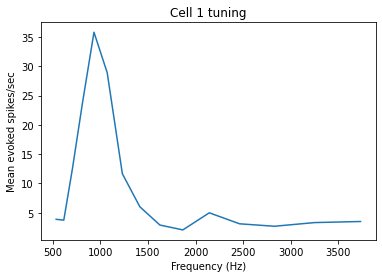

In [55]:
plt.plot(f_list, spike_rates)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Mean evoked spikes/sec')
plt.title('Cell 1 tuning');

In [ ]:
plt.plot(spike_rates)
xticks = np.arange(0,len(f_list),2)
plt.xticks(xticks,f_list[xticks].astype(int))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Mean evoked spikes/sec')
plt.title('Cell 1 tuning');

In [ ]:
plt.semilogx(f_list, spike_rates)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Mean evoked spikes/sec')
plt.title('Cell 1 tuning');

In [ ]:
all_start_times = stim[:,1]

In [ ]:
pre_start_times = all_start_times-0.1
spont_spikes = np.zeros_like(pre_start_times)
for i in range(len(pre_start_times)):
    spont_spikes[i] = np.sum((spikes1>pre_start_times[i]) & (spikes1<all_start_times[i]))
spont_spikes = spont_spikes.mean()

pre_duration = 0.1
spont_rate = spont_spikes/pre_duration


In [ ]:
plt.plot(spike_rates, label='evoked rate')
xticks = np.arange(0,len(f_list),2)
plt.hlines(spont_rate,xticks[0],xticks[-1],linestyles='--', label='spont rate')
plt.xticks(xticks,f_list[xticks].astype(int))
plt.xlabel('Sounds frequency (Hz)')
plt.ylabel('Mean evoked spike rate')
plt.title('Cell 1 tuning')
plt.legend();

In [ ]:
spikes2 = np.loadtxt('data/CRD016c-50-1.csv', delimiter=',')


In [ ]:
mean_spikes2 = np.zeros_like(f_list)
for j,f in enumerate(f_list):
    b = (stim[:,0]==f)
    start_times = stim[b,1]
    stop_times = stim[b,2]

    spike_counts = np.zeros(len(start_times))
    for i in range(len(start_times)):
        spike_counts[i] = np.sum((spikes2>start_times[i]) & (spikes2<stop_times[i]))
    mean_spikes2[j] = spike_counts.mean()
    print(f"{f} Hz: {np.round(mean_spikes[j],2)}")
    
spike_rates2 = mean_spikes2 / stim_duration

In [ ]:
pre_start_times = all_start_times-0.1
spont_spikes2 = np.zeros_like(pre_start_times)
for i in range(len(pre_start_times)):
    spont_spikes2[i] = np.sum((spikes2>pre_start_times[i]) & (spikes2<all_start_times[i]))
spont_rate2 = spont_spikes2.mean() / pre_duration

In [ ]:
plt.plot(spike_rates2, label='evoked rate')
xticks = np.arange(0,len(f_list),2)
plt.hlines(spont_rate2,xticks[0],xticks[-1],linestyles='--', label='spont rate')
plt.xticks(xticks,f_list[xticks].astype(int))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Mean evoked spikes')
plt.title('Cell 2 tuning')
plt.legend();

In [ ]:
plt.plot(spike_rates, label='Cell 1')
plt.plot(spike_rates2, label='Cell 2')
xticks = np.arange(0,len(f_list),2)
plt.xticks(xticks,f_list[xticks].astype(int))
plt.legend()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Mean spike rate');


In [ ]:
color_set = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [ ]:
plt.plot(spike_rates, label='Cell 1')
plt.plot(spike_rates2, label='Cell 2')
xticks = np.arange(0,len(f_list), 2)
plt.hlines(spont_rate, xticks[0], xticks[-1], linestyles='--', colors=color_set[0])
plt.hlines(spont_rate2, xticks[0], xticks[-1], linestyles='--', colors=color_set[1])
plt.xticks(xticks,f_list[xticks].astype(int))
plt.legend()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Mean spike rate');


In [ ]:
f = 933
b = (stim[:,0]==f)
start_times = stim[b,1]
stop_times = stim[b,2]

In [ ]:
spike_counts = np.zeros(len(start_times))
plt.figure()
for i in range(len(start_times)):
    s = start_times[i]-0.1
    e = stop_times[i]+0.1
    
    spike_times = spikes1[(spikes1>s) & (spikes1<e)] - start_times[i]
    print(f"Trial {i}: spikes at {spike_times}")
    plt.plot(spike_times,np.ones(spike_times.shape)*i,'k.')
    
plt.xlim([-0.1, 0.4])

In [ ]:
plt.figure()
row = 0
for j,f in enumerate(f_list):
    b = (stim[:,0]==f)
    start_times = stim[b,1]
    stop_times = stim[b,2]
    for i in range(len(start_times)):
        s = start_times[i]-0.1
        e = stop_times[i]+0.1

        spike_times = spikes1[(spikes1>s) & (spikes1<e)] - start_times[i]
        row += 1
        plt.plot(spike_times,np.ones(spike_times.shape)*row,'k.')

In [ ]:
row = 0
data = []
first_trial_row=np.zeros(f_list.shape)
for j,f in enumerate(f_list):
    first_trial_row[j] = row
    b = (stim[:,0]==f)
    start_times = stim[b,1]
    stop_times = stim[b,2]
    for i in range(len(start_times)):
        s = start_times[i]-0.1
        e = stop_times[i]+0.1

        spike_times = spikes1[(spikes1>s) & (spikes1<e)] - start_times[i]
        this_data = np.array([np.ones(spike_times.shape)*row, spike_times])
        data.append(this_data)
        row += 1
        
data = np.concatenate(data,axis=1)

In [ ]:
plt.plot(data[1,:], data[0,:], 'k.')
plt.vlines([0, 0.3], data[0,:].min(), data[0,:].max(), colors='lightgreen', linestyles='--')
plt.xlabel('Time from sound onset (s)')
plt.yticks(first_trial_row, f_list.astype(int))
plt.ylabel('Sound frequency (Hz)')
plt.title('Cell 1 raster');

In [ ]:
f = 933
b = (stim[:,0]==f)
start_times = stim[b,1]
stop_times = stim[b,2]
plt.figure()
for i in range(len(start_times)):
    s = start_times[i]-0.1
    e = stop_times[i]+0.1
    
    spike_times = spikes2[(spikes2>s) & (spikes2<e)] - start_times[i]
    plt.plot(spike_times,np.ones(spike_times.shape)*i,'k.')
plt.xlim([-0.1, 0.4])